# <div style="text-align: center;">Skills Data Visual Exploration</div>


## Introduction

This notebook uses visualizations to uncover insightful trends in skills data. Our goal is to help job seekers optimize their resumes through examining trends in skills data visualized from job listings across the internet.

We'll start with a word cloud to highlight frequently mentioned concepts at a glance. This primer sets the stage for deeper analysis.

A histogram then provides an overview of general topic prevalence. This foundation laid, subsequent charts can be better interpreted.

Finally, a TF-IDF heatmap reveals the distinctive importance of keywords within postings. With contextual understanding, nuanced findings may emerge.

As each graph builds upon the last, reflect on patterns and hypotheses. Compare your intuitions to revealed insights.

Most importantly, reflect on how these learnings could help advance your career goals. This is just the beginning - our hope is additional questions and ideas will surface.

### Setting Up the Environment

Before diving into the specific visualizations, some initial setup is required. We'll now load the necessary Python libraries, import the data from data_preparation.py file, and define utility functions like adjusting color palettes. This preprocessing stage ensures the data and interactive components are ready for interactive analysis.

In [1]:
# fmt: off
from data_preparation import prepare_data
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import to_rgba
from data_preparation import calculate_tfidf_scores
# fmt: on

In [2]:
# Reading the dataframe from preparation.py
df = prepare_data()
df.head(3)

,index,job_description,job_title,skills,num_phrases,skills_text,num_words,unique_words,num_uniques
0,0,About the job\n \n \nAbout RevolutP...,Head of Product (Crypto Exchange),"[Crypto Exchange Product Management, Team Lead...",6,Crypto Exchange Product Management Team Leader...,15,"[Product, Design, Collaboration, Crypto, UX, L...",12
1,1,About the job\n \n \nASI Reisen ist...,Head of Product (w/m/d),"[Team management, Team development, Process im...",13,Team management Team development Process impro...,22,"[Agile, making, decision, management, Technica...",18
2,2,About the job\n \n \nDepartment: Pr...,Head of Product - Voluum,"[Product Strategy, Team Leadership, Execution,...",13,Product Strategy Team Leadership Execution Mar...,28,"[Cross-Functional, Communication, Leadership, ...",25


In [3]:
# Creating a function to adjust colors
def adjust_colors(base_color, n_colors, darkness_factor, brightness_factor):
    # Generate base colors
    base_colors = sns.color_palette(base_color, n_colors=n_colors)

    # Adjust each color individually
    adjusted_colors = (
        np.array(base_colors)
        * np.array(darkness_factor)[:, np.newaxis]
        * np.array(brightness_factor)[:, np.newaxis]
    )
    adjusted_colors = np.clip(adjusted_colors, 0, 1)

    # Create custom colormap
    custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", adjusted_colors)

    return custom_cmap

## Exploring Word Cloud Patterns

In this segment, we'll explore the word cloud based on the frequency of words across diverse job listings. The visually striking word cloud provides an at-a-glance overview of the most commonly occurring terms, allowing you to identify key patterns and thematic elements in the dataset.

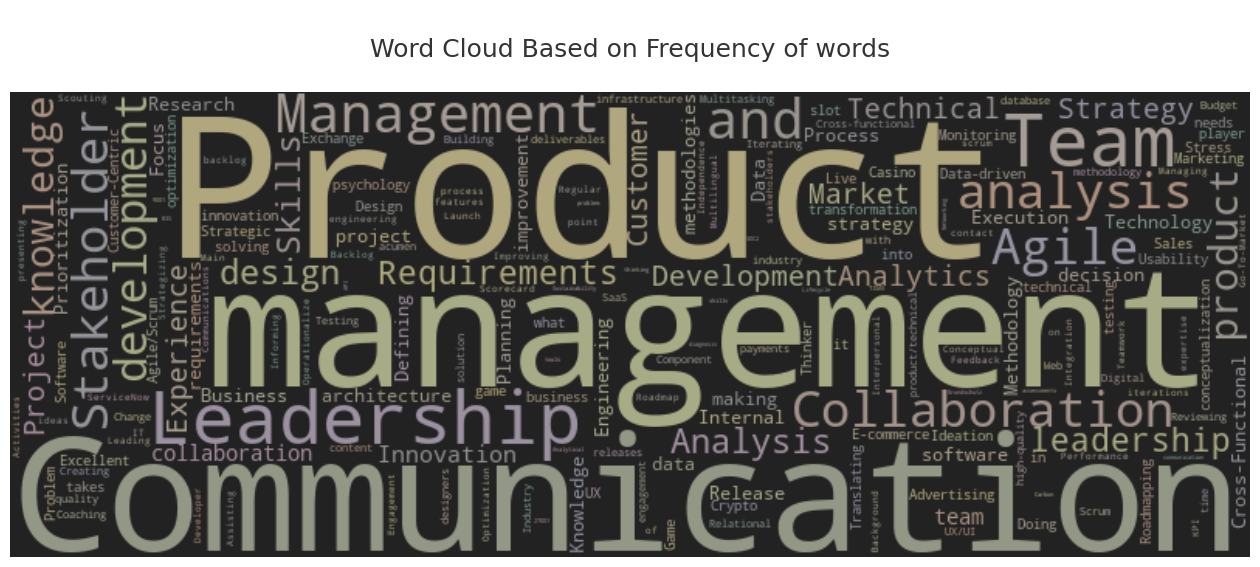

In [4]:
# Using 'unique_words' column from the dataframe
all_words = df["unique_words"].sum()

# Get the frequency of each word across all rows
word_frequencies = {}
for word in all_words:
    if word in word_frequencies:
        word_frequencies[word] += 1
    else:
        word_frequencies[word] = 1

# Convert dictionary to list of (word, count) tuples
word_counts = list(word_frequencies.items())

# Sort by count in descending order
sorted_frequencies = sorted(word_counts, key=lambda x: x[1], reverse=True)

# Create a dictionary with words and their frequencies
wordcloud_data = {word: count for word, count in sorted_frequencies}

wordcloud_cmap = adjust_colors(
    base_color="Pastel2",
    n_colors=len(wordcloud_data),
    darkness_factor=[0.7] * len(wordcloud_data),
    brightness_factor=[1.0] * len(wordcloud_data),
)

# Generate word cloud using frequencies with the darker Pastel2
wordcloud_dark = WordCloud(
    width=800,
    height=300,
    colormap=wordcloud_cmap,
    stopwords=STOPWORDS,
    background_color="#222222",
).generate_from_frequencies(wordcloud_data)

# Plot the darker WordCloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_dark, interpolation="bilinear")
plt.title("\nWord Cloud Based on Frequency of words\n", size=18, color="#333333")
plt.axis("off")
plt.gcf().patch.set_facecolor("white")
plt.show()

### Understanding the Word Cloud

- **Word Size:** The size of each word in the cloud reflects its frequency, with larger words indicating higher usage within the dataset.

Use this dynamic representation to quickly identify prevalent keywords and gain valuable insights into the recurrent themes across various job opportunities.

## Exploring Word Frequencies

In this section, we'll delve into the frequencies of the top words across various job listings. The bar chart below illustrates the distribution of word occurrences, providing insights into which terms are most prevalent in the dataset. The color intensity of each bar reflects both the frequency and uniqueness of the associated word, offering a nuanced view of the dataset.

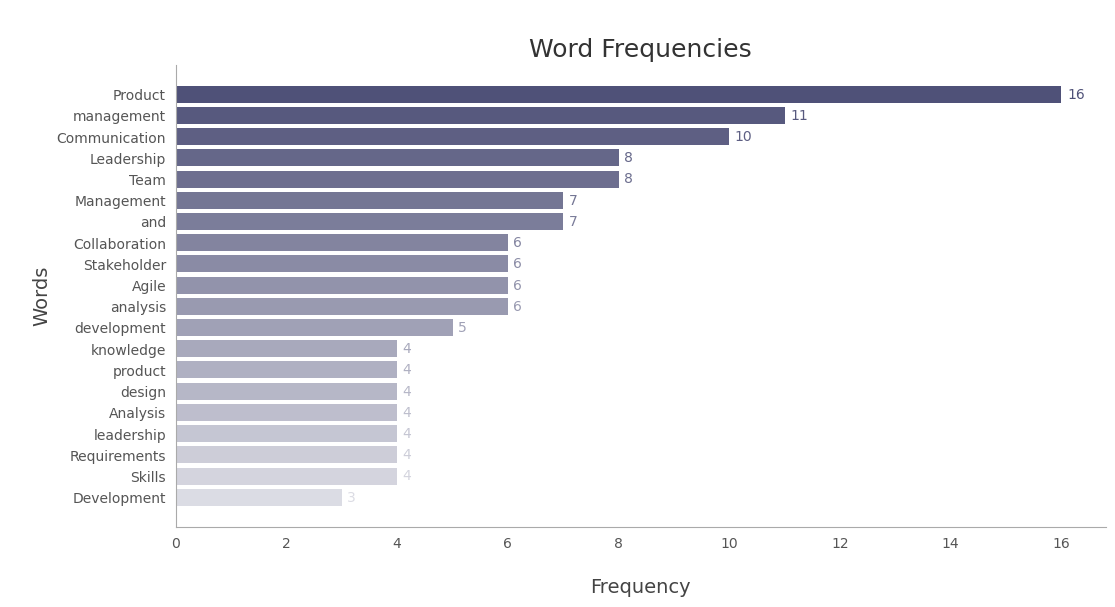

In [5]:
# Choose a single color
base_color = "#4f5178"

# Get the top N words directly from the sorted frequencies (with reversed order)
top_n = 20
top_words_list = [word for word, _ in sorted_frequencies[:top_n][::-1]]
top_frequencies = [count for _, count in sorted_frequencies[:top_n][::-1]]

# Normalize frequencies to use as darkness factors
norm = plt.Normalize(min(top_frequencies), max(top_frequencies))

# Generate a gradient of darkness factors based on the number of bars
darkness_factors = np.linspace(0.2, 1.0, top_n)

# Plot bar chart with varying darkness
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(
    top_words_list,
    top_frequencies,
    color=[to_rgba(base_color, alpha=darkness) for darkness in darkness_factors],
)

ax.set_title("\nWord Frequencies", size=18, color="#333333")
ax.set_xlabel("\nFrequency", size=14, color="#444444")
ax.set_ylabel("\nWords", size=14, color="#444444")

# Remove ticks
plt.tick_params(left=False, bottom=False)

# Hide the right and top spines
ax.spines[["right", "top"]].set_visible(False)

# Hide the right and top spines
ax.spines[["left", "bottom"]].set_color("#AAAAAA")

# Change color of labels
plt.gca().tick_params(axis="x", labelcolor="#555555")
plt.gca().tick_params(axis="y", labelcolor="#555555")

# Optionally, add labels with frequencies next to the bars
for bar, freq, darkness in zip(bars, top_frequencies, darkness_factors):
    ax.text(
        bar.get_width() + 0.1,
        bar.get_y() + bar.get_height() / 2,
        str(freq),
        va="center",
        color=base_color,
        alpha=darkness,
    )

plt.show()

### Understanding the Histogram

- **Color Scale:** The color scale represents the range of darkness factors, highlighting the frequency and impact of each word. Darker bars indicate higher word frequencies within the dataset.

- **Numbers on Bars:** The numbers next to the bars represent the frequency of each word, providing a quantitative measure of its prevalence.

Use this information to identify and prioritize key words that frequently appear in job listings, allowing you to tailor your resume for maximum impact.

## Analyzing Keyword Importance with TF-IDF Heatmap
In this section, we'll explore the significance of keywords within job listings using a Term Frequency-Inverse Document Frequency (TF-IDF) heatmap. The heatmap visually represents the importance of specific keywords in each job listing, helping you identify crucial terms that can make your resume stand out. Let's explore the color-coded heatmap to understand how TF-IDF scores highlight the relevance and uniqueness of keywords across various job opportunities.

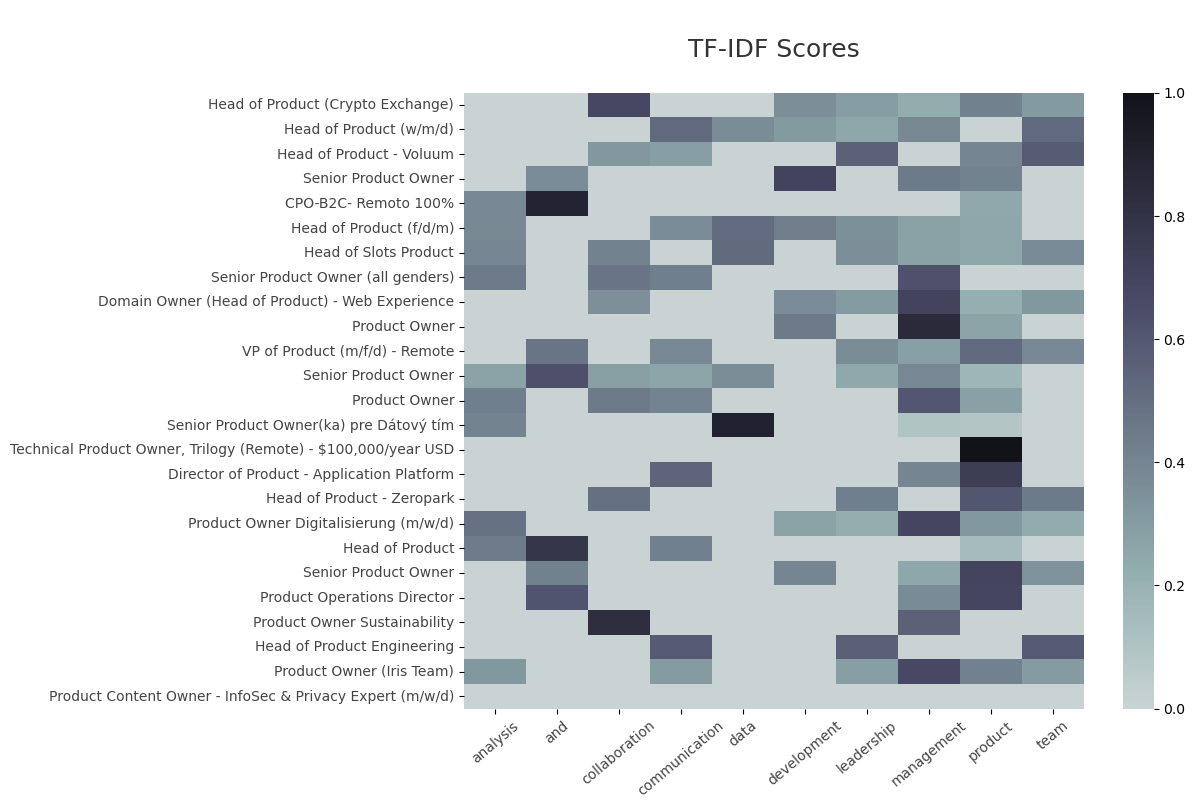

In [6]:
# Use the calculate_tfidf_scores function to get TF-IDF scores
tfidf_scores = calculate_tfidf_scores(df, text_column="skills_text", max_features=10)

# Assume 'job_title' is a column in your DataFrame
job_titles = df["job_title"]

plt.figure(figsize=(10, 8))
plt.title("\nTF-IDF Scores\n", size=18, color="#333333")

heatmap_cmap = adjust_colors(
    base_color="bone_r",
    n_colors=10,
    darkness_factor=[0.9] * 10,
    brightness_factor=[1.0] * 10,
)

heatmap = sns.heatmap(
    tfidf_scores, cmap=heatmap_cmap, cbar=True, yticklabels=job_titles, vmin=0, vmax=1
)
heatmap.set_xticks([i + 0.5 for i in range(10)])
heatmap.set_xticklabels(tfidf_scores.columns, rotation=40, ha="center", color="#444444")
heatmap.set_yticklabels(heatmap.get_yticklabels(), color="#444444")

plt.show()

### Decoding the Heatmap

In the heatmap, each square represents a job listing (y-axis) and a keyword (x-axis). The color of each square indicates the importance of the keyword within that specific job listing. Here's what the colors mean:

- **Color Scale:** The color scale represents the range of TF-IDF scores for each keyword within job listings. Darker colors indicate higher TF-IDF scores, signifying greater importance.

- **Numbers on the Bar:** The numbers next to the color bar correspond to the TF-IDF scores, offering a quantitative scale.

#### Understanding TF-IDF Scores

The color intensity is determined by TF-IDF scores, which stands for Term Frequency-Inverse Document Frequency. Here's a simplified explanation:

- **Term Frequency (TF):** Measures how often a keyword appears in a specific job listing. The more frequent, the higher the TF.

- **Inverse Document Frequency (IDF):** Measures how unique a keyword is across all job listings. If a keyword is rare but present in a few job listings, it gets a higher IDF score.

- **TF-IDF Score:** Combines TF and IDF to assign a score to each keyword in each job listing. Higher TF-IDF scores indicate more unique and impactful keywords for that specific job.

#### Interpreting Results

- **Dark Square:** A dark square with a high TF-IDF score means the keyword is essential and frequently mentioned in that job listing.

- **Comparing Squares:** Compare the darkness across different job listings for the same keyword. Darker squares suggest a consistent and strong relevance of the keyword across those jobs.

Use this information to identify keywords that are both frequent and unique in specific job listings, helping you tailor your resume to the specific requirements of different positions.


## Conclusion: Navigating Insights for Career Success

As we conclude this exploration of skills data visualizations, take a moment to reflect on the journey we've embarked upon. From the dynamic Word Cloud, offering a snapshot of frequently mentioned skills, to the revealing Histogram providing a broader context, and finally, the in-depth TF-IDF Heatmap uncovering the distinctive importance of keywords within job postings, each visualization has contributed to a richer understanding of skills dynamics.

The intricate patterns, nuances, and relationships illuminated through these visuals extend beyond mere data points—they are gateways to informed decision-making in your career strategy. Whether you're tailoring your resume, preparing for interviews, or considering upskilling opportunities, the insights gleaned here offer valuable guidance.

Remember, data visualization is not just about interpreting charts; it's about leveraging knowledge to empower your professional journey. As you navigate your career path, use these visualizations as tools to refine and articulate your unique skill set.

As this chapter closes, it's not the end but a transition to applying newfound insights. What questions have emerged for you? What strategies will you implement? The exploration doesn't end here; it evolves with you.

Thank you for accompanying us on this visual journey through skills data. May your career endeavors be as dynamic and promising as the insights you've uncovered.